# [스파르타코딩클럽] 4주차 : 내가 선택한 전략, 맞았을까? – 파이썬 백테스팅 1

# 1. 라이브러리 설치

In [ ]:
!pip install yfinance pandas-datareader finance-datareader

### 1) 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

import FinanceDataReader as fdr

In [10]:
df = fdr.DataReader('005930','2018')

df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [11]:
# 종가('Close')만 가져오기
df[['Close']]

,Close
Date,
2018-01-02,51020
2018-01-03,51620
2018-01-04,51080
2018-01-05,52120
2018-01-08,52020
...,...
2023-08-11,67500
2023-08-14,67300
2023-08-16,67000


# 2. 간단한 그래프 그려보기

### 1) 주가 그래프

<AxesSubplot: xlabel='Date'>

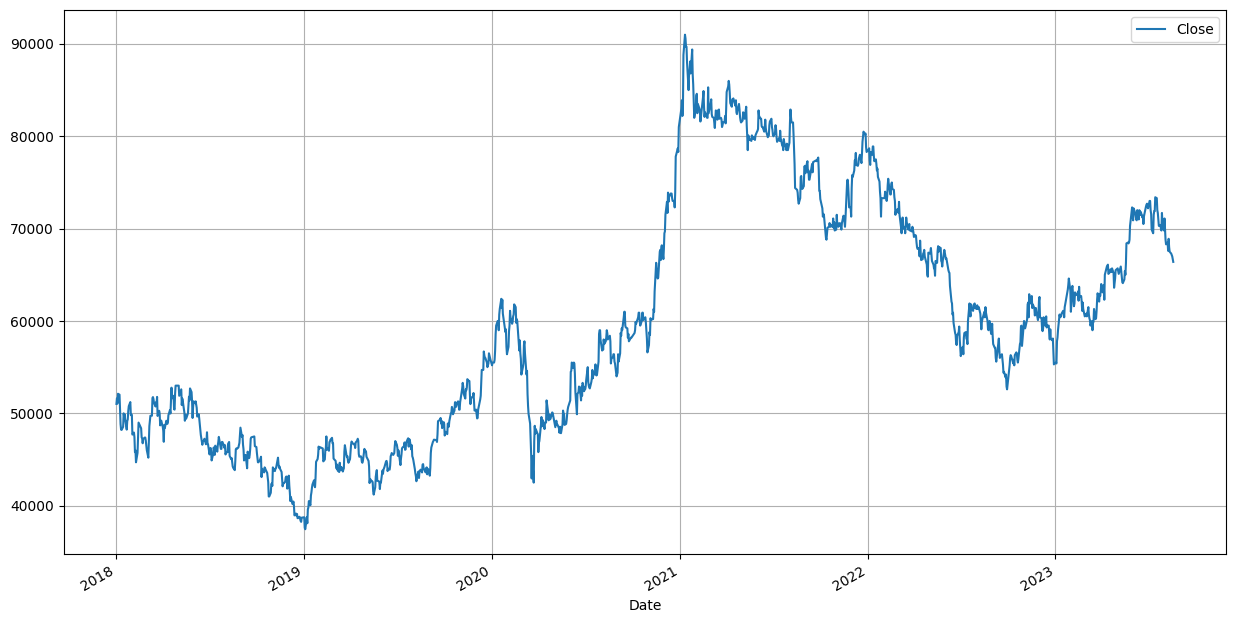

In [15]:
df = fdr.DataReader('005930', '2018')

df.plot(y='Close', figsize=(15,8), grid=True)

### 2) 종목 두 개의 주가 변동 그래프를 그려보기

<AxesSubplot: xlabel='Date'>

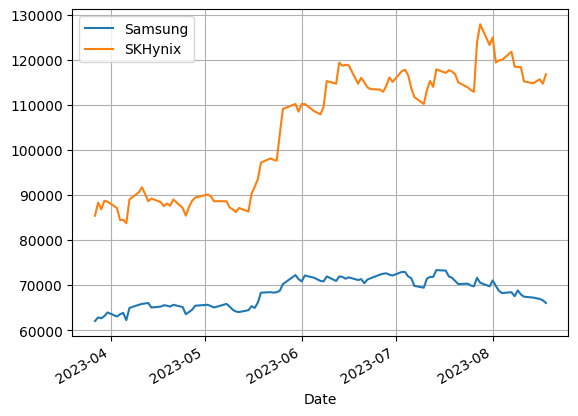

In [23]:
# 최근 100일만 확인
df1 = fdr.DataReader('005930', '2018')
df2 = fdr.DataReader('000660', '2018')

df_tot = pd.DataFrame()

df_tot['Samsung'] = df1['Close']
df_tot['SKHynix'] = df2['Close']

df_tot.tail(100).plot(grid=True)

# 3. 이동평균값 만들기(3일)

### 1) 우선 종가만 모아보기

In [28]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df

,Close
Date,
2018-01-02,51020
2018-01-03,51620
2018-01-04,51080
2018-01-05,52120
2018-01-08,52020
...,...
2023-08-11,67500
2023-08-14,67300
2023-08-16,67000


In [35]:
df = fdr.DataReader('005930', '2018')

df['ma'] = df[['Close']].rolling(3).mean()

df = df[['Close', 'ma']]

df

,Close,ma
Date,,
2018-01-02,51020,NaN
2018-01-03,51620,NaN
2018-01-04,51080,51240.000000
2018-01-05,52120,51606.666667
2018-01-08,52020,51740.000000
...,...,...
2023-08-11,67500,68133.333333
2023-08-14,67300,67600.000000
2023-08-16,67000,67266.666667


# 4. but & sell 표기

### 1) shift를 가지고 열을 맞춰보기

In [36]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df

,Close,ma
Date,,
2018-01-02,51020,NaN
2018-01-03,51620,NaN
2018-01-04,51080,NaN
2018-01-05,52120,51240.000000
2018-01-08,52020,51606.666667
...,...,...
2023-08-11,67500,68166.666667
2023-08-14,67300,68133.333333
2023-08-16,67000,67600.000000


### 2) buy & sell 표기하기

In [37]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

df

,Close,ma,action
Date,,,
2018-01-02,51020,NaN,sell
2018-01-03,51620,NaN,sell
2018-01-04,51080,NaN,sell
2018-01-05,52120,51240.000000,buy
2018-01-08,52020,51606.666667,buy
...,...,...,...
2023-08-11,67500,68166.666667,sell
2023-08-14,67300,68133.333333,sell
2023-08-16,67000,67600.000000,sell


# 5. 수익률 구하기 (1)

### 1) 생각하기1 - 실제로 사는 시점

In [42]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

cond = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')

df[cond]

,Close,ma,action
Date,,,
2018-01-05,52120,51240.000000,buy
2018-01-15,48540,48426.666667,buy
2018-01-23,49160,49153.333333,buy
2018-02-12,45720,45500.000000,buy
2018-02-23,47220,47146.666667,buy
...,...,...,...
2023-07-03,73000,72433.333333,buy
2023-07-11,71500,70333.333333,buy
2023-07-27,71700,70066.666667,buy


### 2) 생각하기2 - 실제로 파는 시점

In [44]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

cond = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

df_sell = df[cond]

df_sell

,Close,ma,action
Date,,,
2018-01-09,50400,51740.000000,sell
2018-01-19,49320,49840.000000,sell
2018-01-30,49800,50753.333333,sell
2018-02-20,47400,48306.666667,sell
2018-02-28,47060,47326.666667,sell
...,...,...,...
2023-07-05,72000,72733.333333,sell
2023-07-18,72000,72866.666667,sell
2023-07-31,69800,70700.000000,sell


# 6. 수익률 구하기 (2)

### 1) 사고, 파는 시점을 붙이기

In [45]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

df.iloc[-1,-1] = 'sell'

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

df_buy = df[cond1]
df_sell = df[cond2]

df_result = pd.concat([df_buy,df_sell],axis=1)

df_result

,Close,ma,action,Close,ma,action
Date,,,,,,
2018-01-05,52120.0,51240.000000,buy,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,50400.0,51740.000000,sell
2018-01-15,48540.0,48426.666667,buy,NaN,NaN,NaN
2018-01-19,NaN,NaN,NaN,49320.0,49840.000000,sell
2018-01-23,49160.0,49153.333333,buy,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-07-31,NaN,NaN,NaN,69800.0,70700.000000,sell
2023-08-01,71100.0,70700.000000,buy,NaN,NaN,NaN
2023-08-02,NaN,NaN,NaN,69900.0,70500.000000,sell


### 2) 전략 세워보기

In [46]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

df.iloc[-1,-1] = 'sell'

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

df_buy = df[cond1].reset_index()
df_sell = df[cond2].reset_index()

df_result = pd.concat([df_buy,df_sell],axis=1)

df_result

,Date,Close,ma,action,Date,Close,ma,action
0,2018-01-05,52120,51240.000000,buy,2018-01-09,50400,51740.000000,sell
1,2018-01-15,48540,48426.666667,buy,2018-01-19,49320,49840.000000,sell
2,2018-01-23,49160,49153.333333,buy,2018-01-30,49800,50753.333333,sell
3,2018-02-12,45720,45500.000000,buy,2018-02-20,47400,48306.666667,sell
4,2018-02-23,47220,47146.666667,buy,2018-02-28,47060,47326.666667,sell
...,...,...,...,...,...,...,...,...
204,2023-07-03,73000,72433.333333,buy,2023-07-05,72000,72733.333333,sell
205,2023-07-11,71500,70333.333333,buy,2023-07-18,72000,72866.666667,sell
206,2023-07-27,71700,70066.666667,buy,2023-07-31,69800,70700.000000,sell
207,2023-08-01,71100,70700.000000,buy,2023-08-02,69900,70500.000000,sell


### 3) 수익률 구하기

In [47]:
df = fdr.DataReader('005930','2018')

df = df[['Close']]

df['ma'] = df.rolling(3).mean().shift(1)

df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

df.iloc[-1,-1] = 'sell'

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

df_buy = df[cond1].reset_index()
df_buy.columns = ['날짜','종가(buy)','이평값','액션']

df_sell = df[cond2].reset_index()
df_sell.columns = ['날짜','종가(sell)','이평값','액션']

df_result = pd.concat([df_buy,df_sell],axis=1)

df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)']

df_result

,날짜,종가(buy),이평값,액션,날짜,종가(sell),이평값,액션,수익률
0,2018-01-05,52120,51240.000000,buy,2018-01-09,50400,51740.000000,sell,0.966999
1,2018-01-15,48540,48426.666667,buy,2018-01-19,49320,49840.000000,sell,1.016069
2,2018-01-23,49160,49153.333333,buy,2018-01-30,49800,50753.333333,sell,1.013019
3,2018-02-12,45720,45500.000000,buy,2018-02-20,47400,48306.666667,sell,1.036745
4,2018-02-23,47220,47146.666667,buy,2018-02-28,47060,47326.666667,sell,0.996612
...,...,...,...,...,...,...,...,...,...
204,2023-07-03,73000,72433.333333,buy,2023-07-05,72000,72733.333333,sell,0.986301
205,2023-07-11,71500,70333.333333,buy,2023-07-18,72000,72866.666667,sell,1.006993
206,2023-07-27,71700,70066.666667,buy,2023-07-31,69800,70700.000000,sell,0.973501
207,2023-08-01,71100,70700.000000,buy,2023-08-02,69900,70500.000000,sell,0.983122


# 7. 수익률 구하기 (3)

### 1) 수익률 계산하기

In [49]:
df_result[['수익률']].cumprod().iloc[-1,-1]

1.3111364061879942

### 2) 함수로 만들기

In [50]:
def get_return(code,n):
  df = fdr.DataReader(code,'2018')

  df = df[['Close']].copy()

  df['ma'] = df.rolling(n).mean().shift(1)

  df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

  df.iloc[-1,-1] = 'sell'

  cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
  cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

  df_buy = df[cond1].reset_index()
  df_buy.columns = ['날짜','종가(buy)','이평값','액션']

  df_sell = df[cond2].reset_index()
  df_sell.columns = ['날짜','종가(sell)','이평값','액션']

  df_result = pd.concat([df_buy,df_sell],axis=1)

  df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)']

  return df_result[['수익률']].cumprod().iloc[-1,-1] - 1

In [53]:
get_return('005930', 3)
get_return('000660', 7)

-0.07364153969014509

# 8. 단기∙장기이평선 적용하기

### 1) 단기∙장기이평선 구하기

In [55]:
df = fdr.DataReader('005930','2018')

df = df[['Close']].copy()

df['ma_1'] = df['Close'].rolling(3).mean().shift(1)
df['ma_2'] = df['Close'].rolling(10).mean().shift(1)

df.head(10)

,Close,ma_1,ma_2
Date,,,
2018-01-02,51020,NaN,NaN
2018-01-03,51620,NaN,NaN
2018-01-04,51080,NaN,NaN
2018-01-05,52120,51240.000000,NaN
2018-01-08,52020,51606.666667,NaN
2018-01-09,50400,51740.000000,NaN
2018-01-10,48840,51513.333333,NaN
2018-01-11,48240,50420.000000,NaN
2018-01-12,48200,49160.000000,NaN


### 2) 적절한 값으로 수정하기

In [56]:
df = fdr.DataReader('005930','2018')

df = df[['Close']].copy()

df['ma_1'] = df['Close'].rolling(3).mean().shift(1)
df['ma_2'] = df['Close'].rolling(10).mean().shift(1)

df['action'] = np.where(df['ma_1'] > df['ma_2'], 'buy', 'sell')

df.iloc[-1,-1] = 'sell'

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

df_buy = df[cond1].reset_index()
df_buy.columns = ['날짜','종가(buy)','이평값1','이평값2','액션']

df_sell = df[cond2].reset_index()
df_sell.columns = ['날짜','종가(sell)','이평값1','이평값2','액션']

df_result = pd.concat([df_buy,df_sell],axis=1)

df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)']

(df_result[['수익률']].cumprod().iloc[-1,-1] - 1)*100

23.321179322095563

### 3) 함수로 만들기

In [57]:
def get_return_sl(code, short, long):
  df = fdr.DataReader(code,'2018')

  df = df[['Close']].copy()

  df['ma1'] = df['Close'].rolling(short).mean().shift(1)
  df['ma2'] = df['Close'].rolling(long).mean().shift(1)

  df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

  df.iloc[-1,-1] = 'sell'

  cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
  cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

  df_buy = df[cond1].reset_index()
  df_buy.columns = ['날짜','종가(buy)','이평값1','이평값2','액션']

  df_sell = df[cond2].reset_index()
  df_sell.columns = ['날짜','종가(sell)','이평값1','이평값2','액션']

  df_result = pd.concat([df_buy,df_sell],axis=1)

  df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)']

  df_final = (df_result[['수익률']].cumprod().tail(1) - 1)*100
  df_final['단기'] = short
  df_final['장기'] = long

  return df_final

In [58]:
get_return_sl('005930',3,30)

,수익률,단기,장기
40,4.178036,3,30


# 9. 4주차 끝 & 숙제 설명

In [59]:
dfs = []
for short in range(3,11):
  for long in range(30,61):
    df = get_return_sl('000660',short,long)
    dfs.append(df)

df_result = pd.concat(dfs)
df_result.sort_values(by='수익률', ascending=False)

,수익률,단기,장기
15,80.009746,10,56
15,72.504429,10,55
14,71.313420,10,58
15,69.289993,10,57
24,68.641332,4,55
...,...,...,...
49,-25.930542,3,33
35,-26.458781,7,33
40,-27.377819,4,35
47,-27.670942,3,34
